# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [5]:
#1
from google.colab import drive
drive.mount('/content/drive')
contents = pd.read_csv("/content/drive/MyDrive/music_genre.csv")

Mounted at /content/drive


In [6]:
#2
dataset = contents.sample(20000)
dataset

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
21078,58104.0,empty_field,Life Is Confusing,63.0,0.955000,0.373,171413.0,0.2160,0.001050,C#,0.0739,-11.410,Major,0.0326,129.03,4-Apr,0.4960,Country
34338,21168.0,Blind Willie McTell,Come On Around to My House Mama,21.0,0.988000,0.613,-1.0,0.2130,0.001280,A#,0.1380,-13.443,Major,0.0603,102.223,4-Apr,0.7100,Blues
42452,59000.0,Johann Sebastian Bach,"Bach, JS: St John Passion, BWV 245, Part 2: No...",41.0,0.985000,0.260,400573.0,0.0284,0.051700,E,0.1210,-25.583,Minor,0.0416,62.507,3-Apr,0.0406,Classical
47775,64253.0,Iggy Azalea,OMG (feat. Wiz Khalifa),58.0,0.004330,0.902,148360.0,0.8050,0.000000,C,0.3140,-6.281,Major,0.1750,140.035,4-Apr,0.8330,Hip-Hop
15351,68052.0,Broken Bells,Control,51.0,0.006760,0.741,221427.0,0.6340,0.000026,A,0.3370,-6.625,Minor,0.0264,113.999,4-Apr,0.9510,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46259,67726.0,Future,RACKS BLUE,60.0,0.233000,0.868,204311.0,0.5480,0.000003,C#,0.1810,-7.864,Major,0.1710,139.999,4-Apr,0.5570,Hip-Hop
14417,56999.0,George Benson,This Masquerade - Remastered Version,36.0,0.500000,0.625,483133.0,0.3730,0.000524,F,0.1320,-12.549,Minor,0.0383,88.54299999999999,4-Apr,0.4300,Jazz
6046,26752.0,Do As Infinity,本日ハ晴天ナリ,25.0,0.034800,0.449,194033.0,0.9650,0.001850,F,0.2150,-2.474,Major,0.0913,188.00400000000002,4-Apr,0.5720,Anime
24232,73963.0,The Avett Brothers,Bella Donna,42.0,0.916000,0.464,183253.0,0.1290,0.001510,A,0.2540,-15.068,Major,0.0336,73.832,4-Apr,0.2000,Country


In [ ]:
#3
if dataset.duplicated().any():
  dataset = dataset.drop_duplicates()
dataset

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
32643,85861.0,The Flamingos,I Only Have Eyes for You,54.0,0.91600,0.552,-1.0,0.3130,0.001700,F,0.1200,-12.410,Major,0.0296,88.554,3-Apr,0.3030,Blues
124,88543.0,Massappeals,7even OH!,30.0,0.00108,0.678,237000.0,0.7110,0.043000,F#,0.2200,-8.911,Minor,0.0568,165.06400000000002,4-Apr,0.3050,Electronic
42299,56513.0,Isaac Albéniz,Granada,34.0,0.99400,0.472,302893.0,0.0827,0.942000,E,0.0942,-22.701,Major,0.0460,115.99,3-Apr,0.0567,Classical
8983,89367.0,Nanahira,Ange Du Blanc Pur,33.0,0.12900,0.331,243319.0,0.9040,0.000304,C,0.3260,-3.271,Minor,0.0824,182.15,4-Apr,0.2280,Anime
39171,44174.0,Blind Melon,Change,57.0,0.60600,0.433,221867.0,0.4600,0.000044,D,0.1750,-10.441,Major,0.0343,77.525,4-Apr,0.5360,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.9410,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.7590,Electronic
17005,53602.0,The Kills,Future Starts Slow,48.0,0.01350,0.677,248200.0,0.7430,0.002220,F#,0.0581,-5.876,Major,0.0611,127.971,4-Apr,0.4690,Alternative
30055,45150.0,Kenny Wayne Shepherd,Take It On Home,30.0,0.06150,0.495,273747.0,0.5420,0.000047,A#,0.1370,-5.968,Major,0.0278,76.985,4-Apr,0.4060,Blues
2896,84488.0,Daft Punk,TRON Legacy (End Titles) - Remixed by Sander K...,35.0,0.00289,0.708,304467.0,0.9110,0.458000,C#,0.3450,-4.186,Major,0.0481,124.024,4-Apr,0.6340,Electronic


In [ ]:
#4
dataset[dataset.artist_name == "empty_field"]


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
35049,79730.0,empty_field,S.E.X.,58.0,0.000035,0.550,233840.0,0.9140,0.322000,G#,0.0894,-2.831,Major,0.0425,134.958,4-Apr,0.8250,Rock
41388,79897.0,empty_field,Julia Florida,0.0,0.993000,0.290,276493.0,0.0183,0.938000,D,0.1210,-34.348,Major,0.0533,76.85,3-Apr,0.2310,Classical
44842,68261.0,empty_field,Written In Stone,28.0,0.817000,0.197,207373.0,0.2330,0.821000,E,0.3380,-16.158,Minor,0.0411,82.165,3-Apr,0.0312,Classical
16074,79736.0,empty_field,The Darker The Weather // The Better The Man,43.0,0.026100,0.483,227253.0,0.7840,0.000139,B,0.2290,-5.851,Minor,0.0387,79.987,4-Apr,0.5120,Alternative
28042,82600.0,empty_field,Um Yea,63.0,0.017000,0.944,219227.0,0.4940,0.000000,D,0.1080,-6.325,Major,0.2700,133.069,4-Apr,0.2020,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33647,57990.0,empty_field,Lose The Right,28.0,0.051200,0.348,-1.0,0.7930,0.000035,F,0.0910,-6.944,Major,0.0727,147.491,4-Apr,0.5740,Blues
46822,76449.0,empty_field,Diamonds,57.0,0.000701,0.831,201050.0,0.7170,0.000003,F#,0.0929,-6.253,Minor,0.0752,150.003,4-Apr,0.6230,Hip-Hop
38434,46832.0,empty_field,Hey You,68.0,0.221000,0.588,278441.0,0.3010,0.002360,C,0.1280,-14.979,Major,0.0294,112.458,4-Apr,0.1900,Rock
15530,52825.0,empty_field,Revelation,40.0,0.100000,0.358,213440.0,0.8580,0.000000,D,0.1340,-4.901,Major,0.0456,158.115,4-Apr,0.3380,Alternative


In [ ]:
dataset.loc[dataset.artist_name != "empty_field"]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
32643,85861.0,The Flamingos,I Only Have Eyes for You,54.0,0.91600,0.552,-1.0,0.3130,0.001700,F,0.1200,-12.410,Major,0.0296,88.554,3-Apr,0.3030,Blues
124,88543.0,Massappeals,7even OH!,30.0,0.00108,0.678,237000.0,0.7110,0.043000,F#,0.2200,-8.911,Minor,0.0568,165.06400000000002,4-Apr,0.3050,Electronic
42299,56513.0,Isaac Albéniz,Granada,34.0,0.99400,0.472,302893.0,0.0827,0.942000,E,0.0942,-22.701,Major,0.0460,115.99,3-Apr,0.0567,Classical
8983,89367.0,Nanahira,Ange Du Blanc Pur,33.0,0.12900,0.331,243319.0,0.9040,0.000304,C,0.3260,-3.271,Minor,0.0824,182.15,4-Apr,0.2280,Anime
39171,44174.0,Blind Melon,Change,57.0,0.60600,0.433,221867.0,0.4600,0.000044,D,0.1750,-10.441,Major,0.0343,77.525,4-Apr,0.5360,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.9410,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.7590,Electronic
17005,53602.0,The Kills,Future Starts Slow,48.0,0.01350,0.677,248200.0,0.7430,0.002220,F#,0.0581,-5.876,Major,0.0611,127.971,4-Apr,0.4690,Alternative
30055,45150.0,Kenny Wayne Shepherd,Take It On Home,30.0,0.06150,0.495,273747.0,0.5420,0.000047,A#,0.1370,-5.968,Major,0.0278,76.985,4-Apr,0.4060,Blues
2896,84488.0,Daft Punk,TRON Legacy (End Titles) - Remixed by Sander K...,35.0,0.00289,0.708,304467.0,0.9110,0.458000,C#,0.3450,-4.186,Major,0.0481,124.024,4-Apr,0.6340,Electronic


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [ ]:
#1
dataset['music_genre'].value_counts(normalize=True)

Classical      0.10266
Anime          0.10141
Electronic     0.10101
Hip-Hop        0.10096
Jazz           0.10046
Rap            0.09971
Country        0.09941
Blues          0.09881
Alternative    0.09816
Rock           0.09741
Name: music_genre, dtype: float64

<Axes: ylabel='genre'>

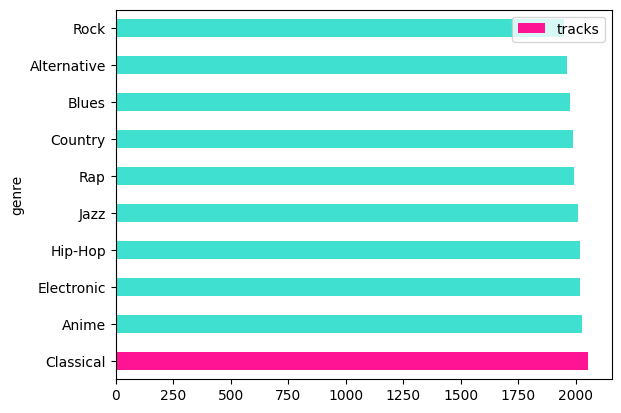

In [ ]:
#2
valid_genres = dataset['music_genre'].dropna().unique()

genres = []
tracks = []

for genre in valid_genres:
    track_num = len(dataset[dataset['music_genre'] == genre])
    genres.append(genre)
    tracks.append(track_num)

genres, tracks = zip(*sorted(zip(genres, tracks), key=lambda x: x[1], reverse=True))

max_number = tracks.index(max(tracks))
colors = ["turquoise" for i in genres]
colors[max_number] = "deeppink"

genres_dataset = pd.DataFrame({"genre": genres, "tracks": tracks})
genres_dataset.plot.barh(x="genre", y="tracks", color=colors)


In [ ]:
#3
max_dance = -100000
max_genre = ""

for genre in dataset['music_genre'].dropna().unique():
    genre_df = dataset[dataset['music_genre'] == genre]
    average_dance = genre_df['danceability'].mean()
    
    if average_dance > max_dance:
        max_dance = average_dance
        max_genre = genre
        
print(f"Танцевальный жанр {max_genre} имеет наивысший показатель танцевабельности\nсо значением {max_dance}.")

Танцевальный жанр Hip-Hop имеет наивысший показатель танцевабельности
со значением 0.7178068350668647.


In [ ]:
#4
for genre in dataset['music_genre'].dropna().unique():
    genre_df = dataset[dataset['music_genre'] == genre]
    mode_counts = genre_df['mode'].value_counts()
    
    if 'Major' in mode_counts.index and 'Minor' in mode_counts.index:
        if mode_counts.loc['Major'] > mode_counts.loc['Minor']:
            print(f"{genre} - Major")
        elif mode_counts.loc['Major'] < mode_counts.loc['Minor']:
            print(f"{genre} - Minor")
        else:
            print(f"{genre} - Modes are equal")
    else:
        print(f"{genre} - No modes specified")

Blues - Major
Electronic - Major
Classical - Major
Anime - Major
Rock - Major
Jazz - Major
Alternative - Major
Hip-Hop - Major
Country - Major
Rap - Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [ ]:
#1
dataset['artist_name'].value_counts(ascending=False).to_frame().head(1)

,artist_name
empty_field,969


In [ ]:
dataset['artist_name'].value_counts(ascending=True).to_frame().head(1)

,artist_name
The Flamingos,1


<Axes: ylabel='artist'>

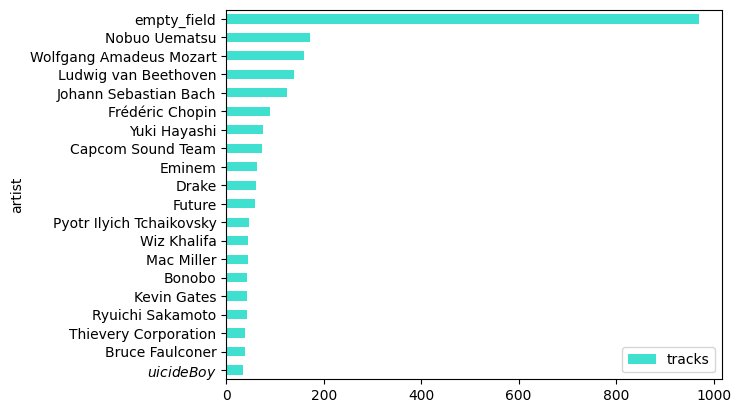

In [ ]:
#2
top_artists = dataset['artist_name'].value_counts().iloc[:20][::-1]

artists = top_artists.index.tolist()
tracks = top_artists.tolist()

artists_df = pd.DataFrame({'artist': artists, 'tracks': tracks})
artists_df.plot.barh(x='artist', y='tracks', color="turquoise")

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

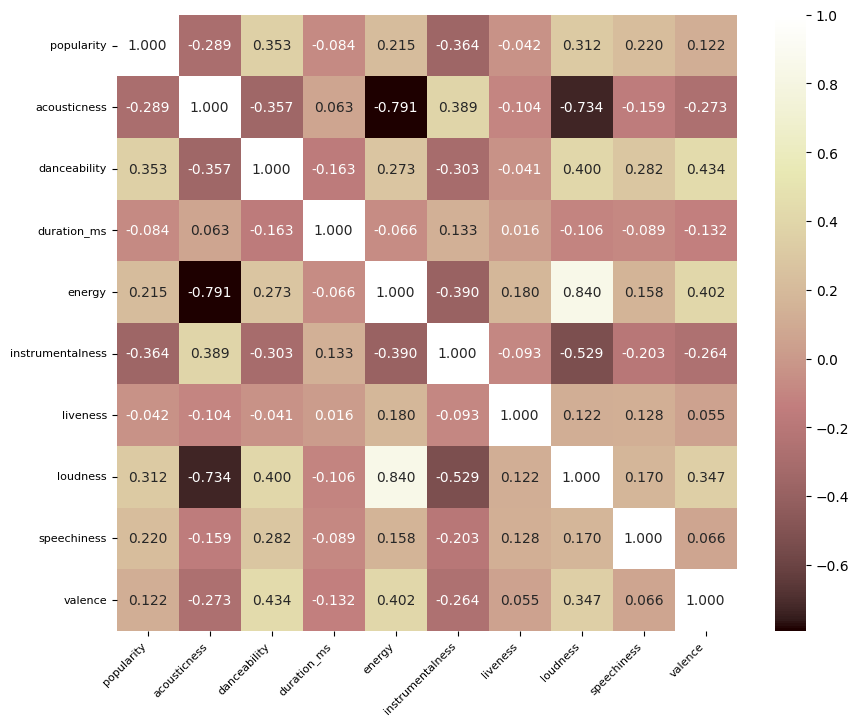

In [16]:
#1
selected_cols = ["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence"]

dataset_clean = dataset[selected_cols].dropna().apply(pd.to_numeric)

correlation_matrix = dataset_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="pink", fmt=".3f")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.show()


In [ ]:
#2
correlation = pd.DataFrame({"popul": dataset['popularity'], "len": [len(str(x)) for x in dataset["track_name"]]})
correlation.corr()

,popul,len
popul,1.000000,-0.219919
len,-0.219919,1.000000


### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

<Axes: xlabel='popularity', ylabel='music_genre'>

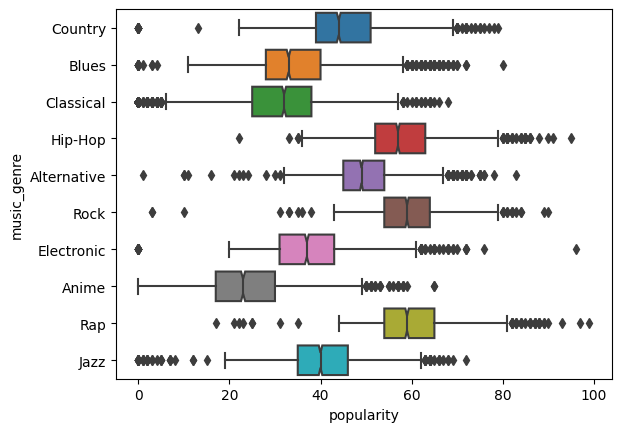

In [9]:
import seaborn as sns
sns.boxplot(x=dataset['popularity'], y=dataset['music_genre'], notch=True)

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

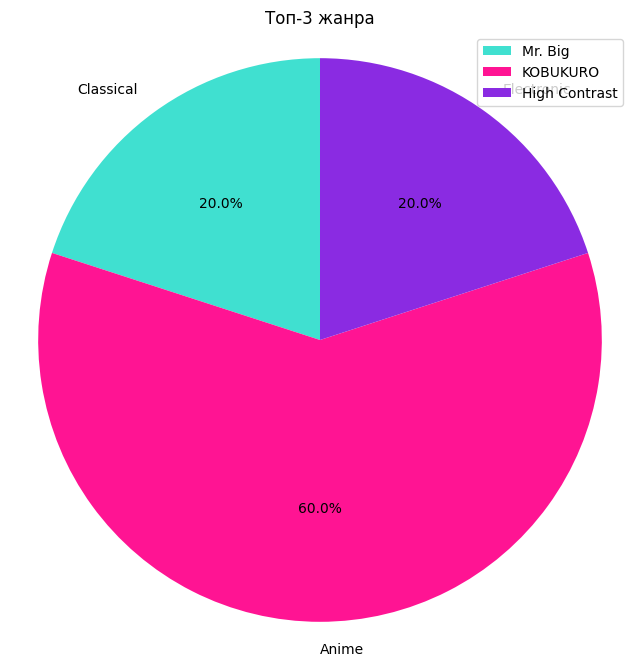

In [ ]:
top_genres = dataset['music_genre'].value_counts().head(3).index.tolist()

top_artists = {}
for genre in top_genres:
    genre_data = dataset[dataset['music_genre'] == genre]
    top_artist = genre_data.groupby('artist_name')['popularity'].mean().idxmax()
    top_artists[genre] = top_artist

pie_data = pd.DataFrame(columns=['Genre', 'Artist', 'Count'])
for genre, artist in top_artists.items():
    genre_data = dataset[dataset['music_genre'] == genre]
    artist_data = genre_data[genre_data['artist_name'] == artist]
    count = len(artist_data)
    pie_data = pie_data._append({'Genre': genre, 'Artist': artist, 'Count': count}, ignore_index=True)

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['turquoise','deeppink','blueviolet']
plt.pie(pie_data['Count'], labels=pie_data['Genre'], colors=colors, startangle=90, autopct='%1.1f%%')
plt.title('Топ-3 жанра')
plt.legend(pie_data['Artist'], loc='best')
plt.axis('equal')
plt.show()


### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

In [ ]:
top_genre = dataset.groupby('music_genre')['popularity'].sum().nlargest(1).index.tolist()[0]
print(top_genre)
not_top_genre = dataset.groupby('music_genre')['popularity'].sum().nsmallest(1).index.tolist()[0]
print(not_top_genre)

top_dataset = dataset[dataset['music_genre'] == top_genre].iloc[:, 1:]
top_dataset.drop(["duration_ms", "popularity"], axis=1, inplace=True)
print(top_dataset)

not_top_dataset = dataset[dataset['music_genre'] == not_top_genre].iloc[:, 1:]
not_top_dataset.drop(["duration_ms", "popularity"], axis=1, inplace=True)
print(not_top_dataset)

Rap
Anime
               artist_name                             track_name  \
28034            DJ Khaled                        All I Do Is Win   
28012  The Black Eyed Peas                        Meet Me Halfway   
29248             Flipsyde                                Someday   
27041             Pop Evil                              Footsteps   
27798              OutKast                                  Roses   
...                    ...                                    ...   
25728                  Nas                            Nas Is Like   
25474                 Russ                              Dangerous   
25072          Sammy Adams            Where You Are (feat. Wyred)   
29356               Eminem                 Just Don't Give A Fuck   
28197                  SZA  Childs Play (feat. Chance the Rapper)   

       acousticness  danceability  energy  instrumentalness key  liveness  \
28034      0.010400         0.549   0.791          0.000000  A#    0.4440   
28012  

<ipython-input-192-2a5015b5f11a>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popular_genres = dataset.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).iloc[:1]
<ipython-input-192-2a5015b5f11a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  not_popular_genres = dataset.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).iloc[-1:]


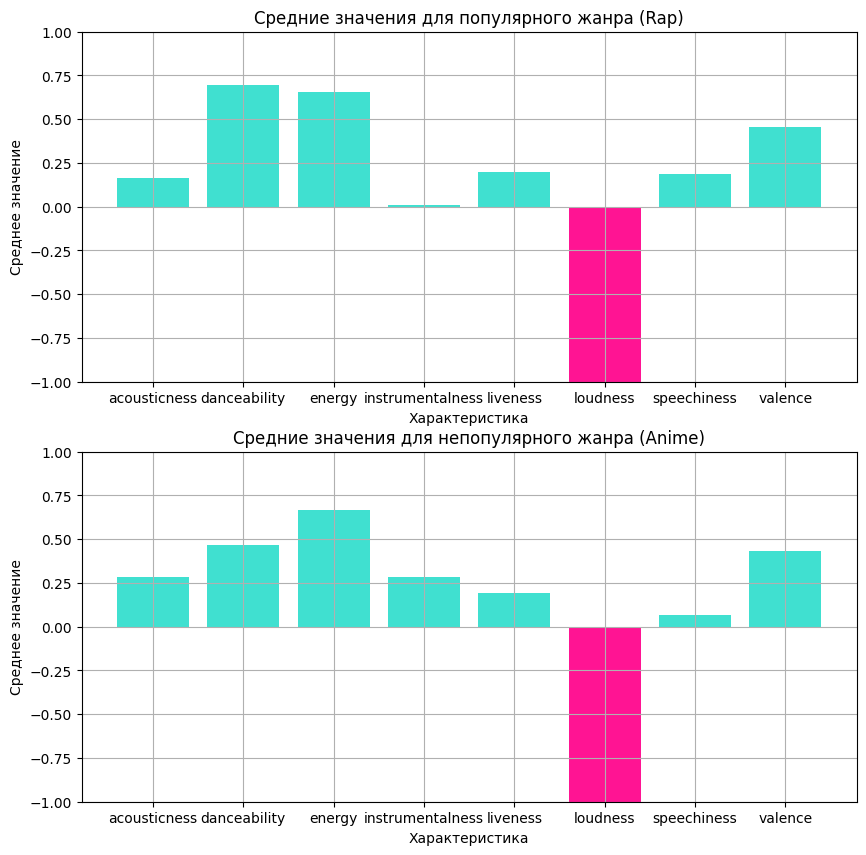

In [ ]:
characteristics = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

popular_genres = dataset.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).iloc[:1]
not_popular_genres = dataset.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).iloc[-1:]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

popular_values = popular_genres[characteristics].values.tolist()[0]
colors_popular = np.where(np.array(popular_values) < 0, 'deeppink', 'turquoise')

axes[0].bar(characteristics, popular_values, color=colors_popular)
axes[0].set_title(f"Средние значения для популярного жанра ({popular_genres.index[0]})")
axes[0].set_ylim([-1, 1])

unpopular_values = not_popular_genres[characteristics].values.tolist()[0]
colors_unpopular = np.where(np.array(unpopular_values) < 0, 'deeppink', 'turquoise')

axes[1].bar(characteristics, unpopular_values, color=colors_unpopular)
axes[1].set_title(f"Средние значения для непопулярного жанра ({not_popular_genres.index[0]})")
axes[1].set_ylim([-1, 1])

for ax in axes.flat:
    ax.set(xlabel='Характеристика', ylabel='Среднее значение')
    ax.grid()

plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [15]:
#1
dataset["длительность_трека"] = ""
for row in dataset.itertuples():
  if row[7] / 60000 <= 3:
    dataset.at[row[0], 'длительность_трека'] = 'короткая'
  elif row[7] / 60000 > 5:
    dataset.at[row[0], 'длительность_трека'] = 'длинная'
  else:
    dataset.at[row[0], 'длительность_трека'] = 'средняя'
dataset

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
21078,58104.0,empty_field,Life Is Confusing,63.0,0.955000,0.373,171413.0,0.2160,0.001050,C#,0.0739,-11.410,Major,0.0326,129.03,4-Apr,0.4960,Country,короткая
34338,21168.0,Blind Willie McTell,Come On Around to My House Mama,21.0,0.988000,0.613,-1.0,0.2130,0.001280,A#,0.1380,-13.443,Major,0.0603,102.223,4-Apr,0.7100,Blues,короткая
42452,59000.0,Johann Sebastian Bach,"Bach, JS: St John Passion, BWV 245, Part 2: No...",41.0,0.985000,0.260,400573.0,0.0284,0.051700,E,0.1210,-25.583,Minor,0.0416,62.507,3-Apr,0.0406,Classical,длинная
47775,64253.0,Iggy Azalea,OMG (feat. Wiz Khalifa),58.0,0.004330,0.902,148360.0,0.8050,0.000000,C,0.3140,-6.281,Major,0.1750,140.035,4-Apr,0.8330,Hip-Hop,короткая
15351,68052.0,Broken Bells,Control,51.0,0.006760,0.741,221427.0,0.6340,0.000026,A,0.3370,-6.625,Minor,0.0264,113.999,4-Apr,0.9510,Alternative,средняя
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46259,67726.0,Future,RACKS BLUE,60.0,0.233000,0.868,204311.0,0.5480,0.000003,C#,0.1810,-7.864,Major,0.1710,139.999,4-Apr,0.5570,Hip-Hop,средняя
14417,56999.0,George Benson,This Masquerade - Remastered Version,36.0,0.500000,0.625,483133.0,0.3730,0.000524,F,0.1320,-12.549,Minor,0.0383,88.54299999999999,4-Apr,0.4300,Jazz,длинная
6046,26752.0,Do As Infinity,本日ハ晴天ナリ,25.0,0.034800,0.449,194033.0,0.9650,0.001850,F,0.2150,-2.474,Major,0.0913,188.00400000000002,4-Apr,0.5720,Anime,средняя
24232,73963.0,The Avett Brothers,Bella Donna,42.0,0.916000,0.464,183253.0,0.1290,0.001510,A,0.2540,-15.068,Major,0.0336,73.832,4-Apr,0.2000,Country,средняя


<Axes: xlabel='loudness', ylabel='Density'>

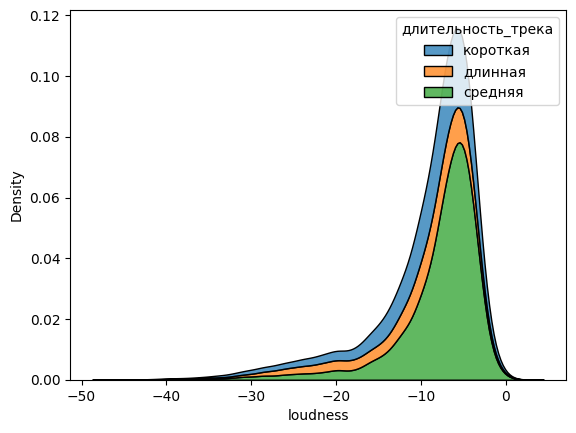

In [14]:
#2
sns.kdeplot(data=dataset, x='loudness', hue='длительность_трека', multiple='stack')

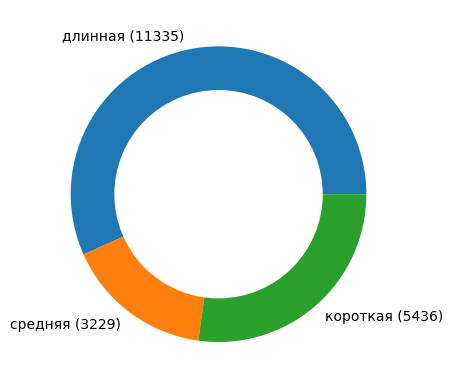

In [19]:
#3
groups = [dataset[dataset['длительность_трека'] == x]['длительность_трека'].count() for x in set(dataset['длительность_трека'])]
fig, ax = plt.subplots()
labels = ["длинная", "средняя", "короткая"]
for i in range(len(labels)):
    labels[i]+=" ("+str(groups[i])+")"

ax.pie(groups, labels=labels)

center_circle=plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(center_circle)

plt.show()